# The Sparks Foundation GRIP #JUNE22 -- Data Science and Business Analytics Internship

Task - 1 Prediction using supervised Machine Learning

By Nallamanti Swetha

Problem Statement

1.To predict the percentage of a student based on the number of study hours

2.Predict the score of a student studies for 9.25 hrs/day

In [1]:
# required modules importing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## reading the dataset using pandas
data=pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# now we are knowing the shape ( No of rows, No of cols)
data.shape

(25, 2)

In [5]:
#  giving  the information and describes the data 
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

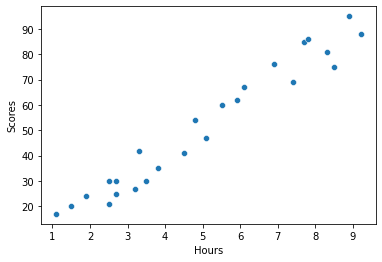

In [6]:
# plotting  the data 
sns.scatterplot(x=data['Hours'],y=data['Scores'])

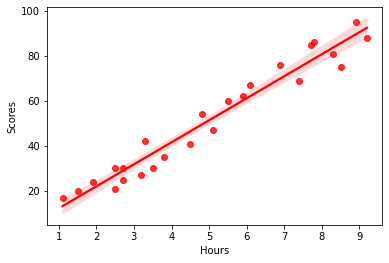

In [8]:
#lets do the regression  to get better understanding
sns.regplot(x=data['Hours'],y=data['Scores'],color='red');

# Lets prepare the data after the regression process

In [9]:
#Dividing the data into inputs and outputs
x=data[['Hours']]
y=data['Scores']

In [10]:
#Splitting the data for both training and testing
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x,y, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Training the model

In [12]:
regressor.fit(train_x,train_y)

LinearRegression()

# Predicting the data

In [13]:
pred_y = regressor.predict(val_x)

In [14]:
pd.DataFrame({'Actual': val_y, 'Predicted':pred_y})

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


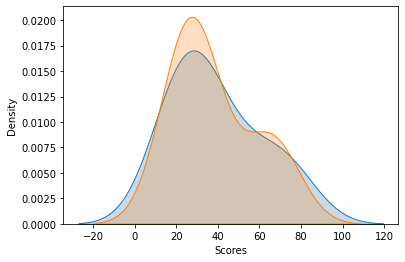

In [15]:
## Actual vs predicted distribution plot graph
sns.kdeplot(pred_y, label="Predicted", shade=True);
sns.kdeplot(data=val_y, label="Actual", shade=True);

In [16]:
# Train and test accuracy
print("training Accuracy is:", regressor.score(train_x, train_y),"\n test accuracy is:", regressor.score(val_x,val_y))

training Accuracy is: 0.9484509249326872 
 test accuracy is: 0.9367661043365056


In [17]:
## Mean Absolute error
from sklearn import metrics
print('Mean absolute Error:', metrics.mean_absolute_error(val_y, pred_y))
print("Max Error:", metrics.max_error(val_y, pred_y))

Mean absolute Error: 4.130879918502482
Max Error: 6.74557493951356


In [18]:
# Here is the predicted score, if a student studies for a 9.25 hrs / day
h=[[9.25]]
s=regressor.predict(h)
print('A student who studies ', h[0][0], 'hours is estimated to score ', s[0])

A student who studies  9.25 hours is estimated to score  93.89272889341652


# The final output is:
If a student who studies 9.25 hrs/day is estimated to score 93.89272889341655